# Análise de Algoritmos para Detecção de Fraudes em Transações Financeiras


## Experimento

In [ ]:
import random
import time
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def gerar_transacoes(quantidade, minimo=1, maximo=1000):

  return [random.randint(minimo, maximo) for _ in range(quantidade)]

In [ ]:
random.seed(42)

In [ ]:
def tres_somas_ingenuo(valores, alvo):

  n = len(valores)

  for i in range(n):

    for j in range(i + 1, n):

      for k in range(j + 1, n):

        if valores[i] + valores[j] + valores[k] == alvo:

          return (valores[i], valores[j], valores[k])
  return None

In [ ]:
def tres_somas_rapido(valores, alvo):

  arr = sorted(valores)
  n = len(arr)

  for i in range(n - 2):

    alvo2 = alvo - arr[i]

    l = i + 1
    r = n - 1

    while l < r:

      s = arr[l] + arr[r]

      if s == alvo2:

        return (arr[i], arr[l], arr[r])

      elif s < alvo2:

        l += 1

      else:

        r -= 1

  return None

## Experimento 1 - Execução 10ˆ4

In [ ]:
tamanhos = list(range(1000, 10001, 200))

tempos_ingenuo = []
tempos_otimizado = []

controle_repeticao = 10

print("Execução do experimento até 10.000 elementos")
print()

for tamanho in tamanhos:

  print(f"Processando n = {tamanho}")

  acumulado_ingenuo = 0
  acumulado_otimizado = 0

  for repeticao in range(controle_repeticao):

    vetor = gerar_transacoes(tamanho)
    i, j, k = random.sample(range(tamanho), 3)
    alvo = vetor[i] + vetor[j] + vetor[k]

    inicio = time.perf_counter()
    resultado_ing = tres_somas_ingenuo(vetor, alvo)
    fim = time.perf_counter()
    acumulado_ingenuo += (fim - inicio)

    inicio = time.perf_counter()
    resultado_opt = tres_somas_rapido(vetor, alvo)
    fim = time.perf_counter()
    acumulado_otimizado += (fim - inicio)

    if resultado_opt is None:

        raise SystemExit(f"Erro: algoritmo otimizado não encontrou solução para n={tamanho}")

  tempos_ingenuo.append(acumulado_ingenuo / controle_repeticao)
  tempos_otimizado.append(acumulado_otimizado / controle_repeticao)

df10k = pd.DataFrame({
    "n": tamanhos,
    "tempo_ingenuo": tempos_ingenuo,
    "tempo_otimizado": tempos_otimizado
})

df10k.to_csv("resultado_experimento_1.csv", index=False)

Execução do experimento até 10.000 elementos

Processando n = 1000
Processando n = 1200
Processando n = 1400
Processando n = 1600
Processando n = 1800
Processando n = 2000
Processando n = 2200
Processando n = 2400
Processando n = 2600
Processando n = 2800
Processando n = 3000
Processando n = 3200
Processando n = 3400
Processando n = 3600
Processando n = 3800
Processando n = 4000
Processando n = 4200
Processando n = 4400
Processando n = 4600
Processando n = 4800
Processando n = 5000
Processando n = 5200
Processando n = 5400
Processando n = 5600
Processando n = 5800
Processando n = 6000
Processando n = 6200
Processando n = 6400
Processando n = 6600
Processando n = 6800
Processando n = 7000
Processando n = 7200
Processando n = 7400
Processando n = 7600
Processando n = 7800
Processando n = 8000
Processando n = 8200
Processando n = 8400
Processando n = 8600
Processando n = 8800
Processando n = 9000
Processando n = 9200
Processando n = 9400
Processando n = 9600
Processando n = 9800
Processan

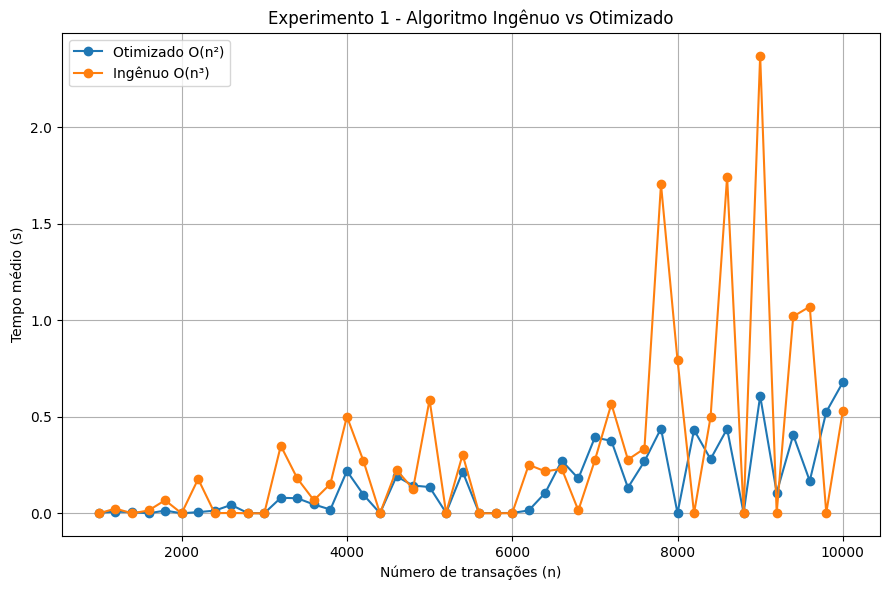

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(df10k["n"], df10k["tempo_otimizado"], marker="o", label="Otimizado O(n²)")
plt.plot(df10k["n"], df10k["tempo_ingenuo"], marker="o", label="Ingênuo O(n³)")
plt.xlabel("Número de transações (n)")
plt.ylabel("Tempo médio (s)")
plt.title("Experimento 1 - Algoritmo Ingênuo vs Otimizado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Experimento 2 - Execução 10^5 (Otimizado)

In [ ]:
tamanhos_extensos = list(range(1000,101001, 5000))
tempos_otimizado_extenso = []

controle_repeticao_2 = 10

print("Execução do experimento até 100.000 elementos")
print()

for tamanho in tamanhos_extensos:

  print(f"Processando n = {tamanho}")

  acumulado_otimizado = 0

  for repeticao in range(controle_repeticao_2):
    vetor = gerar_transacoes(tamanho)
    i, j, k = random.sample(range(tamanho), 3)
    alvo = vetor[i] + vetor[j] + vetor[k]

    inicio = time.perf_counter()
    resultado = tres_somas_rapido(vetor, alvo)
    fim = time.perf_counter()
    acumulado_otimizado += (fim - inicio)

    if resultado is None:

      raise SystemExit(f"Erro: algoritmo otimizado não encontrou solução para n={tamanho}")

  tempos_otimizado_extenso.append(acumulado_otimizado / controle_repeticao_2)

df100k = pd.DataFrame({
    "n": tamanhos_extensos,
    "tempo_otimizado": tempos_otimizado_extenso
})

df100k.to_csv("resultado_experimento_2.csv", index=False)

Execução do experimento até 100.000 elementos

Processando n = 1000
Processando n = 6000
Processando n = 11000
Processando n = 16000
Processando n = 21000
Processando n = 26000
Processando n = 31000
Processando n = 36000
Processando n = 41000
Processando n = 46000
Processando n = 51000
Processando n = 56000
Processando n = 61000
Processando n = 66000
Processando n = 71000
Processando n = 76000
Processando n = 81000
Processando n = 86000
Processando n = 91000
Processando n = 96000
Processando n = 101000


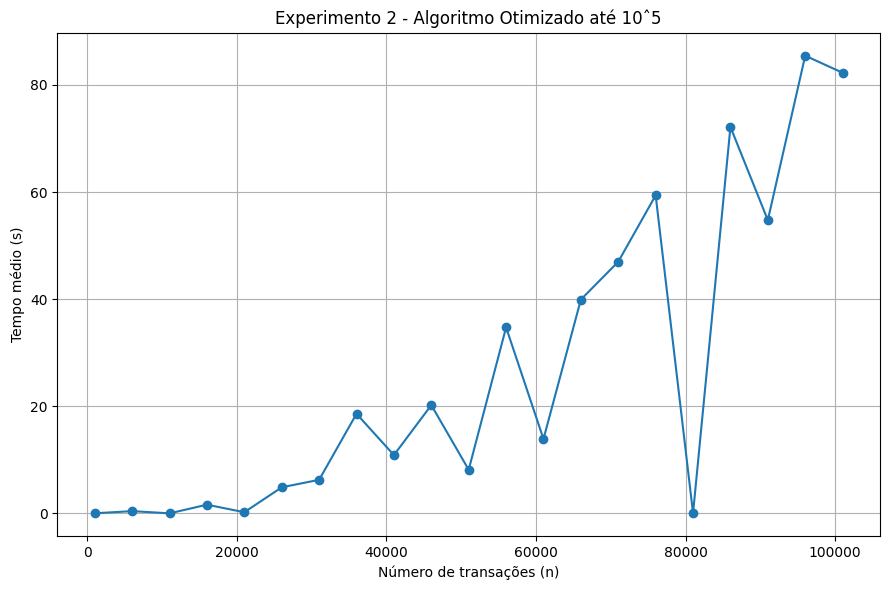

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(df100k["n"], df100k["tempo_otimizado"], marker="o", label="Otimizado O(n²)")
plt.xlabel("Número de transações (n)")
plt.ylabel("Tempo médio (s)")
plt.title("Experimento 2 - Algoritmo Otimizado até 10ˆ5")
plt.grid(True)
plt.tight_layout()
plt.show()